In [1]:
%pip install tensorflow==2.15.0 opencv-python mediapipe scikit-learn matplotlibpython -m venv myenv

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Program Files\Python312\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Program Files\Python312\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Program Files\Python312\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Program Files\Python312\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Program Files\Python312\python.exe -m pip install [options] <archive url/path> ...

no such option: -m


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 1. Build keypoint using Mediapipe Holistic

In [3]:
# Initializing the Model
mp_holistic = mp.solutions.holistic

# Initializing the drawing utils
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results): 
    # Draw face connections 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))  
    # Draw pose connections 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))  
    # Draw left hand connections 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))  
    # Draw right hand connections   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [7]:
cap = cv2.VideoCapture(0)

# Initializing current time and precious time for calculating the FPS
previousTime = 0
currentTime = 0

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Capture frame
        success, frame = cap.read()

        # Making predictions
        image, results = mediapipe_detection(frame, holistic)

        draw_styled_landmarks(image, results)

        # Calculating the FPS
        currentTime = time.time()
        fps = 1 / (currentTime-previousTime)
        previousTime = currentTime
        
        # Displaying FPS on the image
        cv2.putText(image, str(int(fps))+" FPS", (10, 470), 
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Press 'q' to quit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [8]:
draw_styled_landmarks(frame, results)

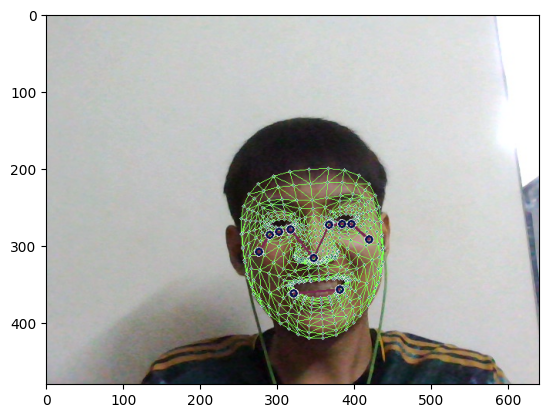

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))